In [43]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

#1
1) If the sample size is large, we can generally expect a more felxible method to do better. This is because there are not many predictions to be made, and there is a lot of data to make accurate preditions with. the f will be more accurate
2) If the number of predictors is large, but the number of observations is small, it would most like be best to go with a less flexible method of prediction. This is because a more flexible method will need alot more data to make good predictions, but a less flexible method requires less data to get a better function accuracy
3) IF the predictors and repsonse is highly non-linear, it would be best to go with a more flexible method. This will lead a function that can more accuratly follow the datta and lead to less bias. The down side is, there might be alot of variance in the error because of the high variance in the data.
4) A less flexible model will be best if the variance is extermely high. It is more likely to make a better prediction when new data is introduced to the trained model.  

#4
1) Some real life applications for classification can be predicting whether by dog breed, if it will have a certain health condition. Say the dog breed is a golden retriever at a certain age, weight and exercise level, what is likely hood of future hip displacia. This problem would be inference because you would most likely get a probability. 
2) Regression is usefull when you want to predict one real-valued y. This can be done on a data set like sales, where you want to predict sales, and you can use the variables like customer, age, product, etc. The goal of this problem is prediction, because you are hoping to get real values that follow your past data and can predict the future. 
3) Cluster analyses can be useful when you have no idea what the data is telling you and it is catagorical. Cluster analysis allows you to put the dataset in groups and visual how those different groups look like. 

Question 8

In [4]:
#Question 8
# Read the College dataset
df = pd.read_csv('../datasets/College.csv')

df.index = df.iloc[:, 0]
df = df.drop(df.columns[0], axis=1)


In [5]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Unnamed: 0                                                              
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Unnamed: 0                                                                    
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Unnamed: 0                                                                 
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Unnamed: 0                                                               
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [6]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

array([[<Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Accept', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>,
        <Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Top25perc', ylabel='Apps'>,
        <Axes: xlabel='F.Undergrad', ylabel='Apps'>,
        <Axes: xlabel='P.Undergrad', ylabel='Apps'>,
        <Axes: xlabel='Outstate', ylabel='Apps'>,
        <Axes: xlabel='Room.Board', ylabel='Apps'>,
        <Axes: xlabel='Books', ylabel='Apps'>,
        <Axes: xlabel='Personal', ylabel='Apps'>,
        <Axes: xlabel='PhD', ylabel='Apps'>,
        <Axes: xlabel='Terminal', ylabel='Apps'>,
        <Axes: xlabel='S.F.Ratio', ylabel='Apps'>,
        <Axes: xlabel='perc.alumni', ylabel='Apps'>,
        <Axes: xlabel='Expend', ylabel='Apps'>,
        <Axes: xlabel='Grad.Rate', ylabel='Apps'>],
       [<Axes: xlabel='Apps', ylabel='Accept'>,
        <Axes: xlabel='Accept', ylabel='Accept'>,
        <Axes: xlabel='Enroll', ylabel='Accept'>,
    

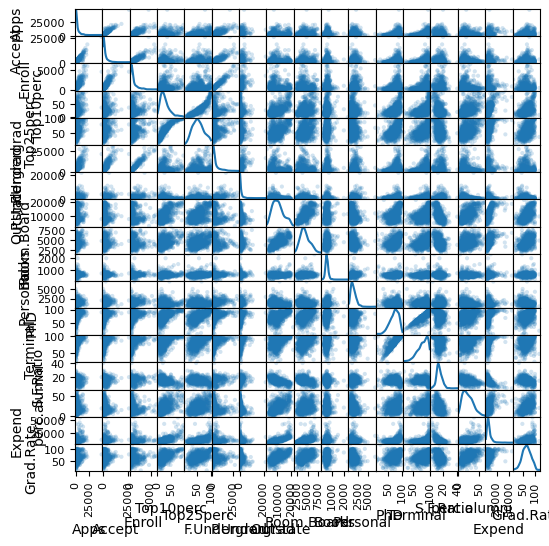

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

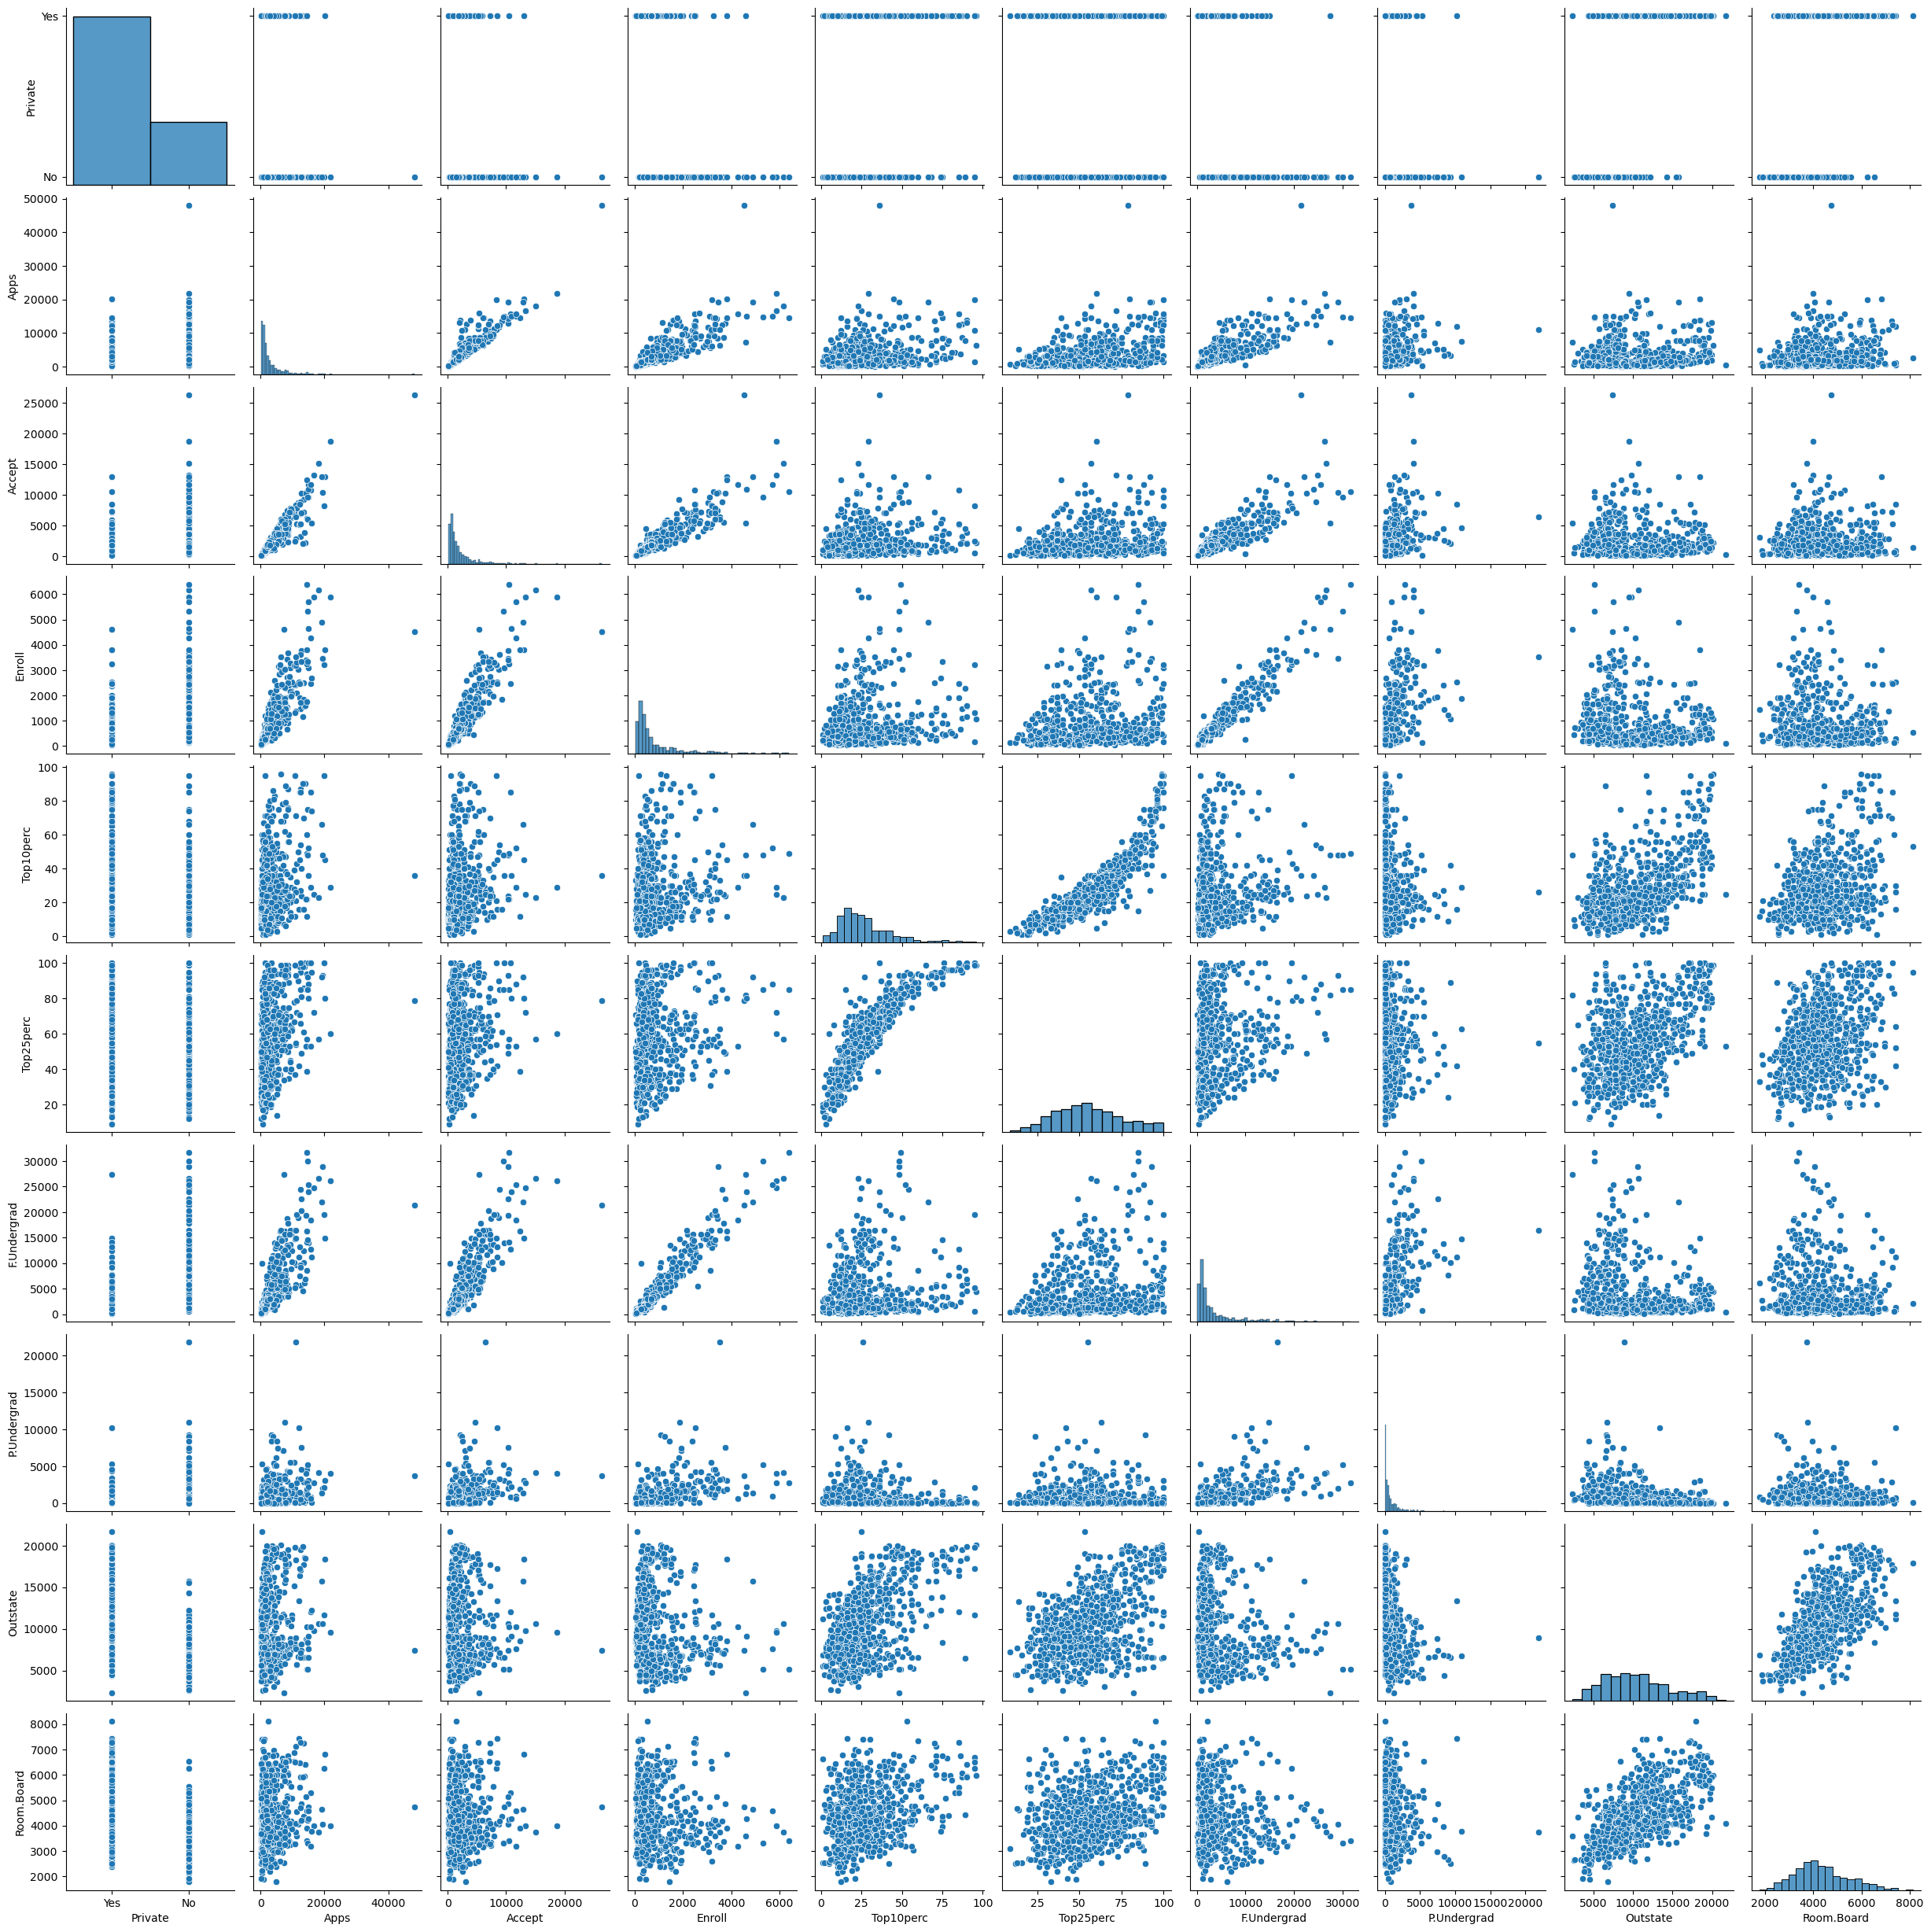

In [8]:
column_names = df.columns[:10].tolist()
sns.pairplot(df, vars=column_names)

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

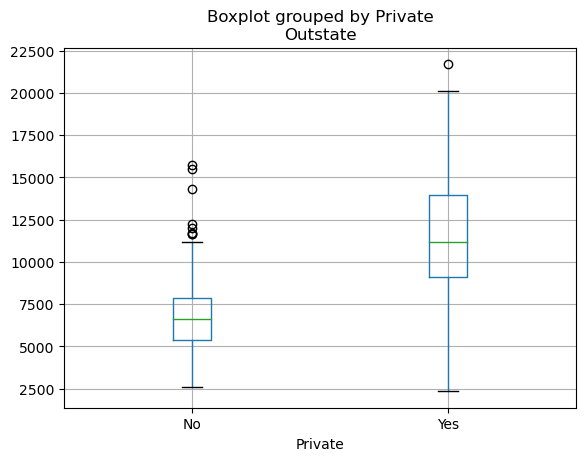

In [9]:
df.boxplot(column='Outstate', by='Private')

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

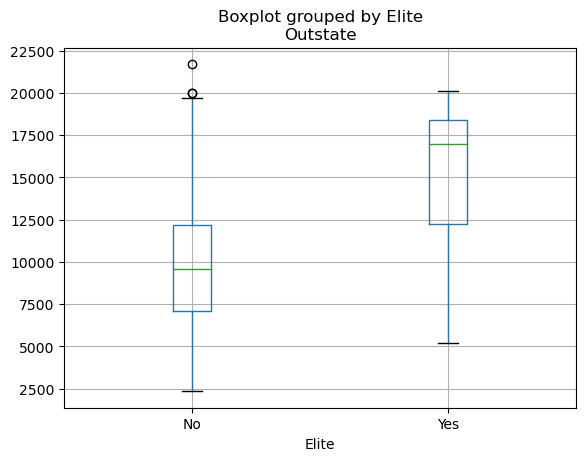

In [10]:
df['Elite'] = ['Yes' if x > 50 else 'No' for x in df['Top10perc']]
df['Elite'].value_counts()
df.boxplot(column='Outstate', by='Elite')


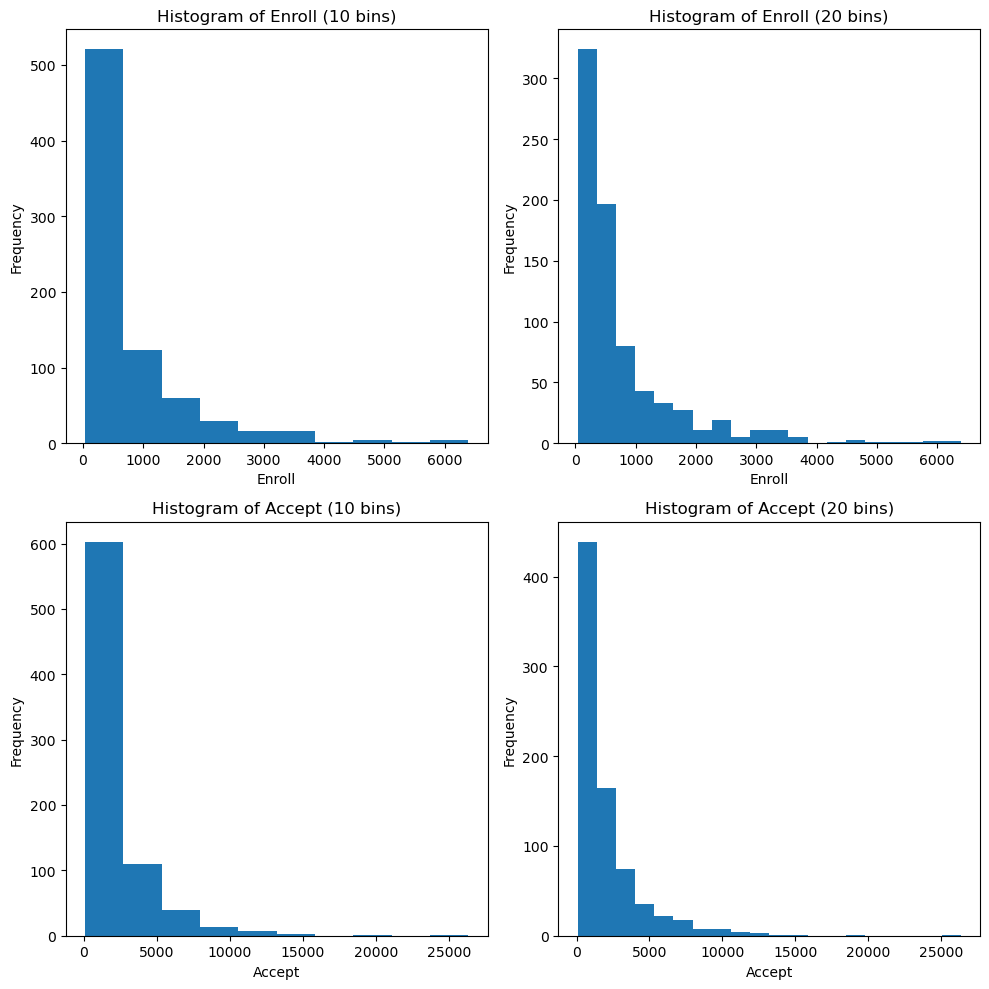

In [11]:


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for 'Enroll' with 10 bins
axs[0, 0].hist(df['Enroll'], bins=10)
axs[0, 0].set_title('Histogram of Enroll (10 bins)')
axs[0, 0].set_xlabel('Enroll')
axs[0, 0].set_ylabel('Frequency')

# Histogram for 'Enroll' with 20 bins
axs[0, 1].hist(df['Enroll'], bins=20)
axs[0, 1].set_title('Histogram of Enroll (20 bins)')
axs[0, 1].set_xlabel('Enroll')
axs[0, 1].set_ylabel('Frequency')

# Histogram for 'Accept' with 10 bins
axs[1, 0].hist(df['Accept'], bins=10)
axs[1, 0].set_title('Histogram of Accept (10 bins)')
axs[1, 0].set_xlabel('Accept')
axs[1, 0].set_ylabel('Frequency')

# Histogram for 'Accept' with 20 bins
axs[1, 1].hist(df['Accept'], bins=20)
axs[1, 1].set_title('Histogram of Accept (20 bins)')
axs[1, 1].set_xlabel('Accept')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot layout
fig = make_subplots(rows=2, cols=2)

# Add histograms to subplots
fig.add_trace(go.Histogram(x=df['Enroll'], nbinsx=10), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Enroll'], nbinsx=20), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Accept'], nbinsx=10), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Accept'], nbinsx=20), row=2, col=2)

# Update layout
fig.update_layout(height=600, width=800, title_text="Subplots of histograms")

fig.show()

Question #9 using the Auto dataset

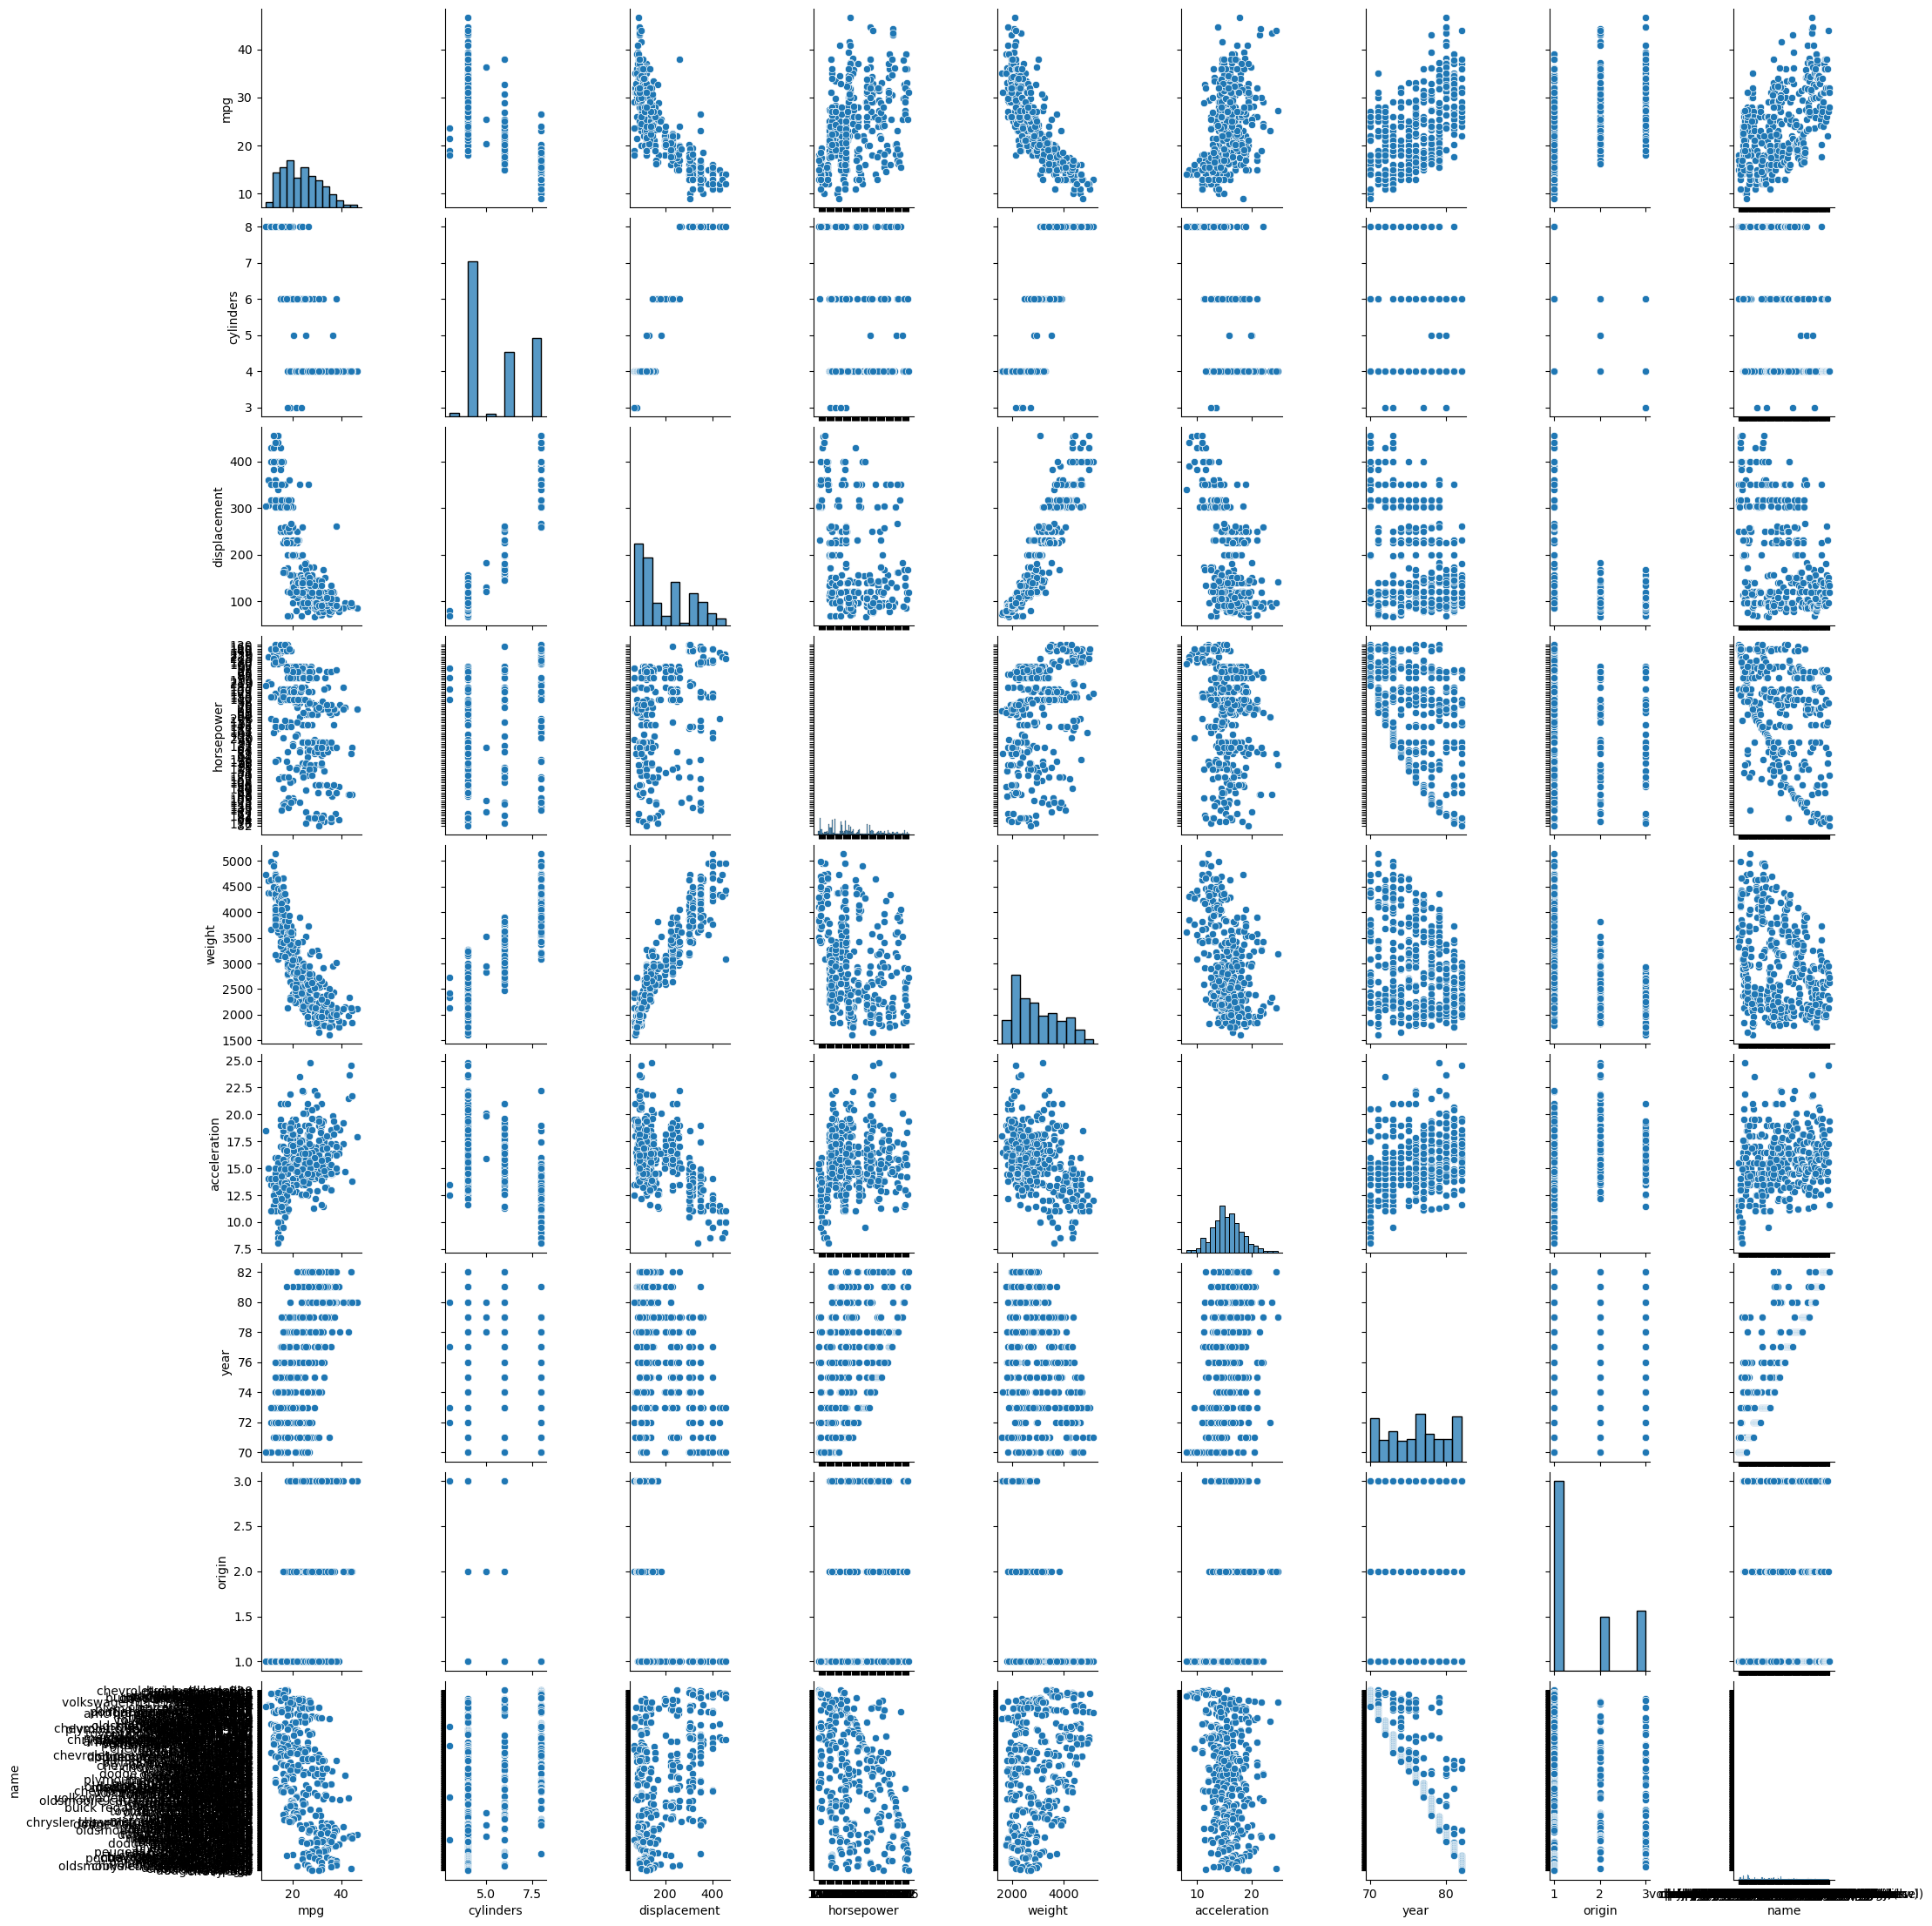

In [14]:
auto_df = pd.read_csv('../datasets/Auto.csv')
column_names = auto_df.columns.tolist()
sns.pairplot(auto_df, vars=column_names)

(a) the qualitative variables are name, year, origin and cyliners. The quantative variables are mpg, displacement, horsepower, weight, and acceleration. 
 

In [27]:
#(b) find the ranges of qunatitative variables
def range_func(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df[column_name].max() - df[column_name].min()

column_names_quantitative = ['mpg','displacement','horsepower','weight','acceleration']
ranges = [range_func(auto_df, column_name) for column_name in column_names_quantitative]
for column_name, range_value in zip(column_names_quantitative, ranges):
    print(f"Range of {column_name}: {range_value}")

Range of mpg: 37.6
Range of displacement: 387.0
Range of horsepower: 184.0
Range of weight: 3527
Range of acceleration: 16.8


In [28]:
#(c) find the mean and standard deviation of quantitative variables
def mean_std_func(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df[column_name].mean(), df[column_name].std()

mean_std_values = [mean_std_func(auto_df, column_name) for column_name in column_names_quantitative]

for column_name, values in zip(column_names_quantitative, mean_std_values):
    print(f"Column: {column_name}, Mean: {values[0]}, Standard Deviation: {values[1]}")

Column: mpg, Mean: 23.51586901763224, Standard Deviation: 7.825803928946563
Column: displacement, Mean: 193.53274559193954, Standard Deviation: 104.37958329992955
Column: horsepower, Mean: 104.46938775510205, Standard Deviation: 38.49115993282849
Column: weight, Mean: 2970.2619647355164, Standard Deviation: 847.9041194897246
Column: acceleration, Mean: 15.55566750629723, Standard Deviation: 2.749995292976151


In [29]:
#(d) remove 10th through 85th observations, then find range, mean and standard deviation

auto_df_dropped = auto_df.drop(auto_df.index[9:85])

ranges = [range_func(auto_df_dropped, column_name) for column_name in column_names_quantitative]
mean_std_values = [mean_std_func(auto_df_dropped, column_name) for column_name in column_names_quantitative]

for column_name, range_value, values in zip(column_names_quantitative, ranges, mean_std_values):
    print(f"Column: {column_name}, Range: {range_value}, Mean: {values[0]}, Standard Deviation: {values[1]}")

Column: mpg, Range: 35.6, Mean: 24.438629283489096, Standard Deviation: 7.90818424894519
Column: displacement, Range: 387.0, Mean: 187.04984423676012, Standard Deviation: 99.63538531961505
Column: horsepower, Range: 184.0, Mean: 100.95583596214512, Standard Deviation: 35.89556677713123
Column: weight, Range: 3348, Mean: 2933.96261682243, Standard Deviation: 810.6429384125485
Column: acceleration, Range: 16.3, Mean: 15.723052959501558, Standard Deviation: 2.6805138313971684


In [30]:
# Select predictor variables
predictor_variables = auto_df[column_names_quantitative]

# Compute correlation matrix
correlation_matrix = predictor_variables.corr()

# Print correlation matrix
print(correlation_matrix)

                   mpg  displacement  horsepower    weight  acceleration
mpg           1.000000     -0.804443   -0.778427 -0.831739      0.422297
displacement -0.804443      1.000000    0.897257  0.933104     -0.544162
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196
weight       -0.831739      0.933104    0.864538  1.000000     -0.419502
acceleration  0.422297     -0.544162   -0.689196 -0.419502      1.000000


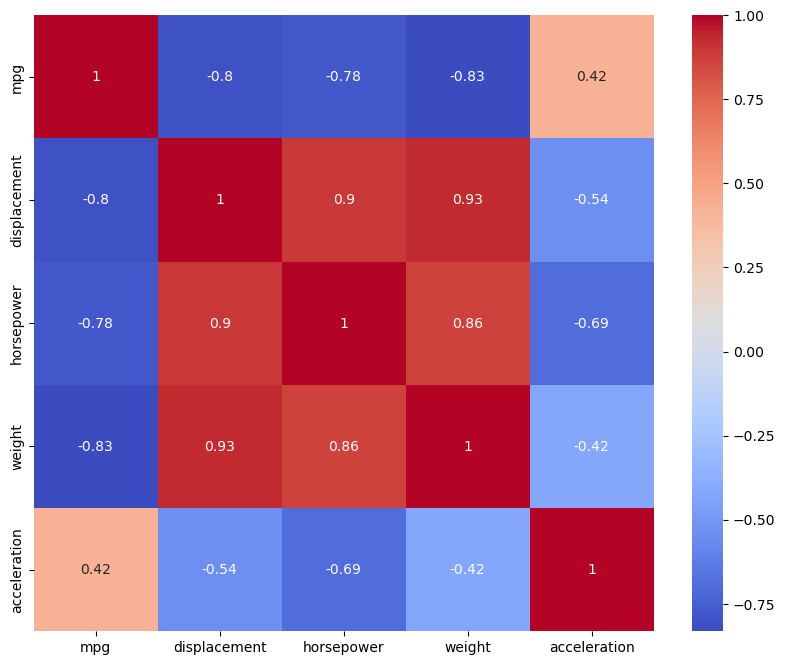

In [31]:
# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

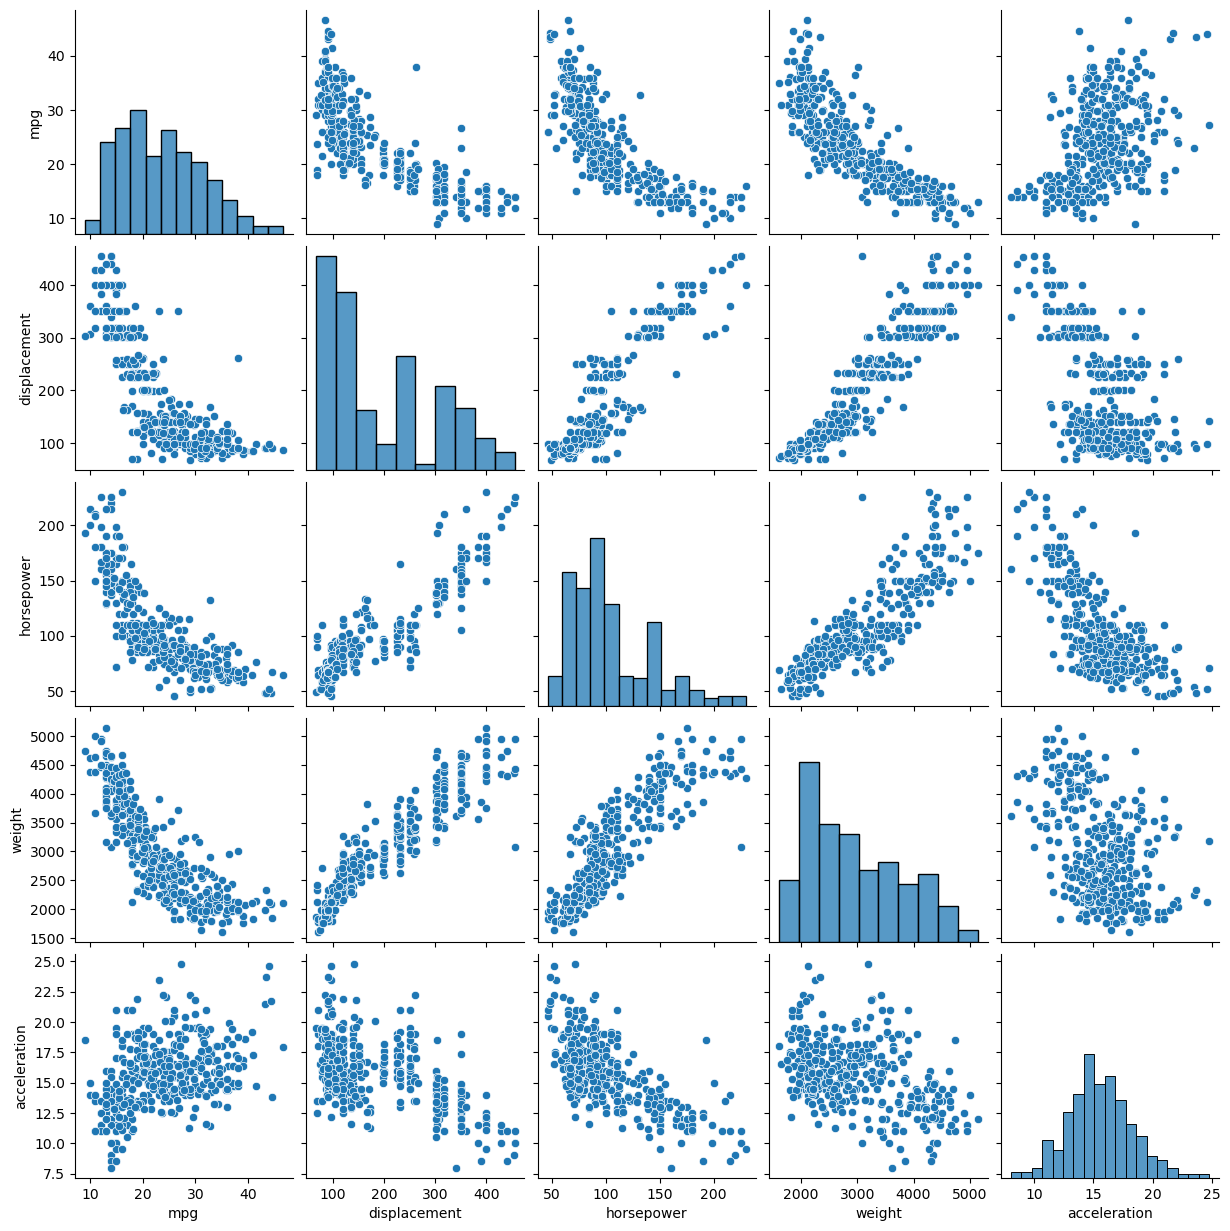

In [32]:
sns.pairplot(auto_df[column_names_quantitative])
plt.show()

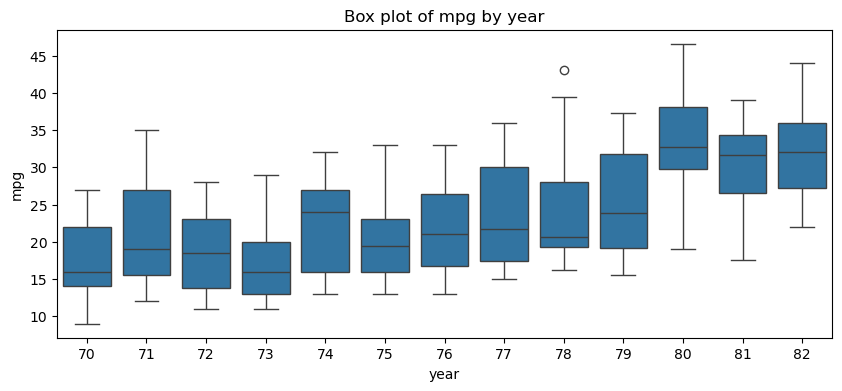

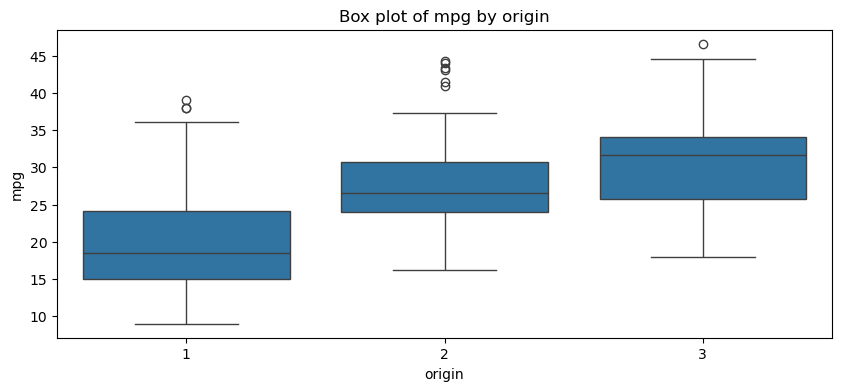

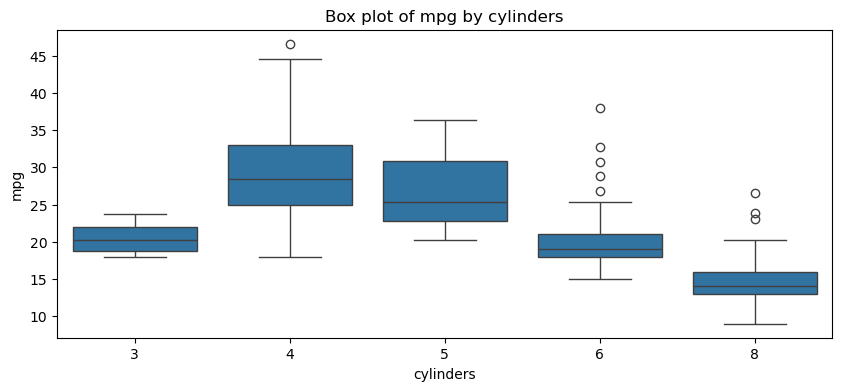

In [34]:
qualitative_variables = ['year', 'origin', 'cylinders']

for var in qualitative_variables:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=var, y='mpg', data=auto_df)
    plt.title(f'Box plot of mpg by {var}')
    plt.show()

(f) Based on our findings, if we wanted to predict mpg, it seems we would be able to use engine displacement, horsepower, and weight. These values seem to have a high R value that indicates a relationship between them. Acceleration does not seem to be correlated enough to make an accurate prediction. There does seem to be a little bit of a relationship between them, but it is very scattered. There also seems to be a relationship with how many cylinders there are, and the mpg. As cylinders increase, mpg decreases. Certain origins of vehicles also have different mpgs, and that can be a relationship that can predict mpg. 

Mean Absolute Error: 2.9455696202531643
Mean Squared Error: 15.782779746835443
Root Mean Squared Error: 3.9727546799211555


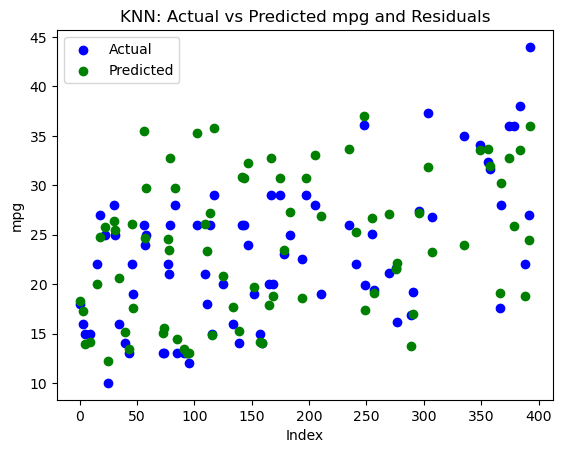

In [68]:
# Define the predictor variables
predictor_variables = ['displacement', 'horsepower', 'weight', 'cylinders', 'origin']

# Convert non-numeric values to NaN
for column in predictor_variables:
    auto_df[column] = pd.to_numeric(auto_df[column], errors='coerce')

# Drop rows with NaN values
auto_df = auto_df.dropna()

X = auto_df[predictor_variables]
y = auto_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print errors
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Create a scatter plot of the actual values
plt.scatter(y_test.index, y_test, color='blue', label='Actual')

# Create a scatter plot of the predicted values
plt.scatter(y_test.index, y_pred, color='green', label='Predicted')


# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('mpg')
plt.title('KNN: Actual vs Predicted mpg and Residuals')
plt.legend()

# Display the plot
plt.show()

Question #10 using the Boston housing dataset 

In [92]:
df_boston = pd.read_csv('../datasets/Boston.csv')
df_boston.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
df_boston.set_index('ID', inplace=True)
df_boston.head()    


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
ID                                                                              
1   0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2   0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3   0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4   0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5   0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

     black  lstat  medv  
ID                       
1   396.90   4.98  24.0  
2   396.90   9.14  21.6  
3   392.83   4.03  34.7  
4   394.63   2.94  33.4  
5   396.90   5.33  36.2

In [88]:
#how many colmns 
len(df_boston.columns.tolist())

14

In [85]:
#how many rows
len(df_boston)

506


- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per $10,000.
- `ptratio`: pupil-teacher ratio by town.
- `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in $1000s.

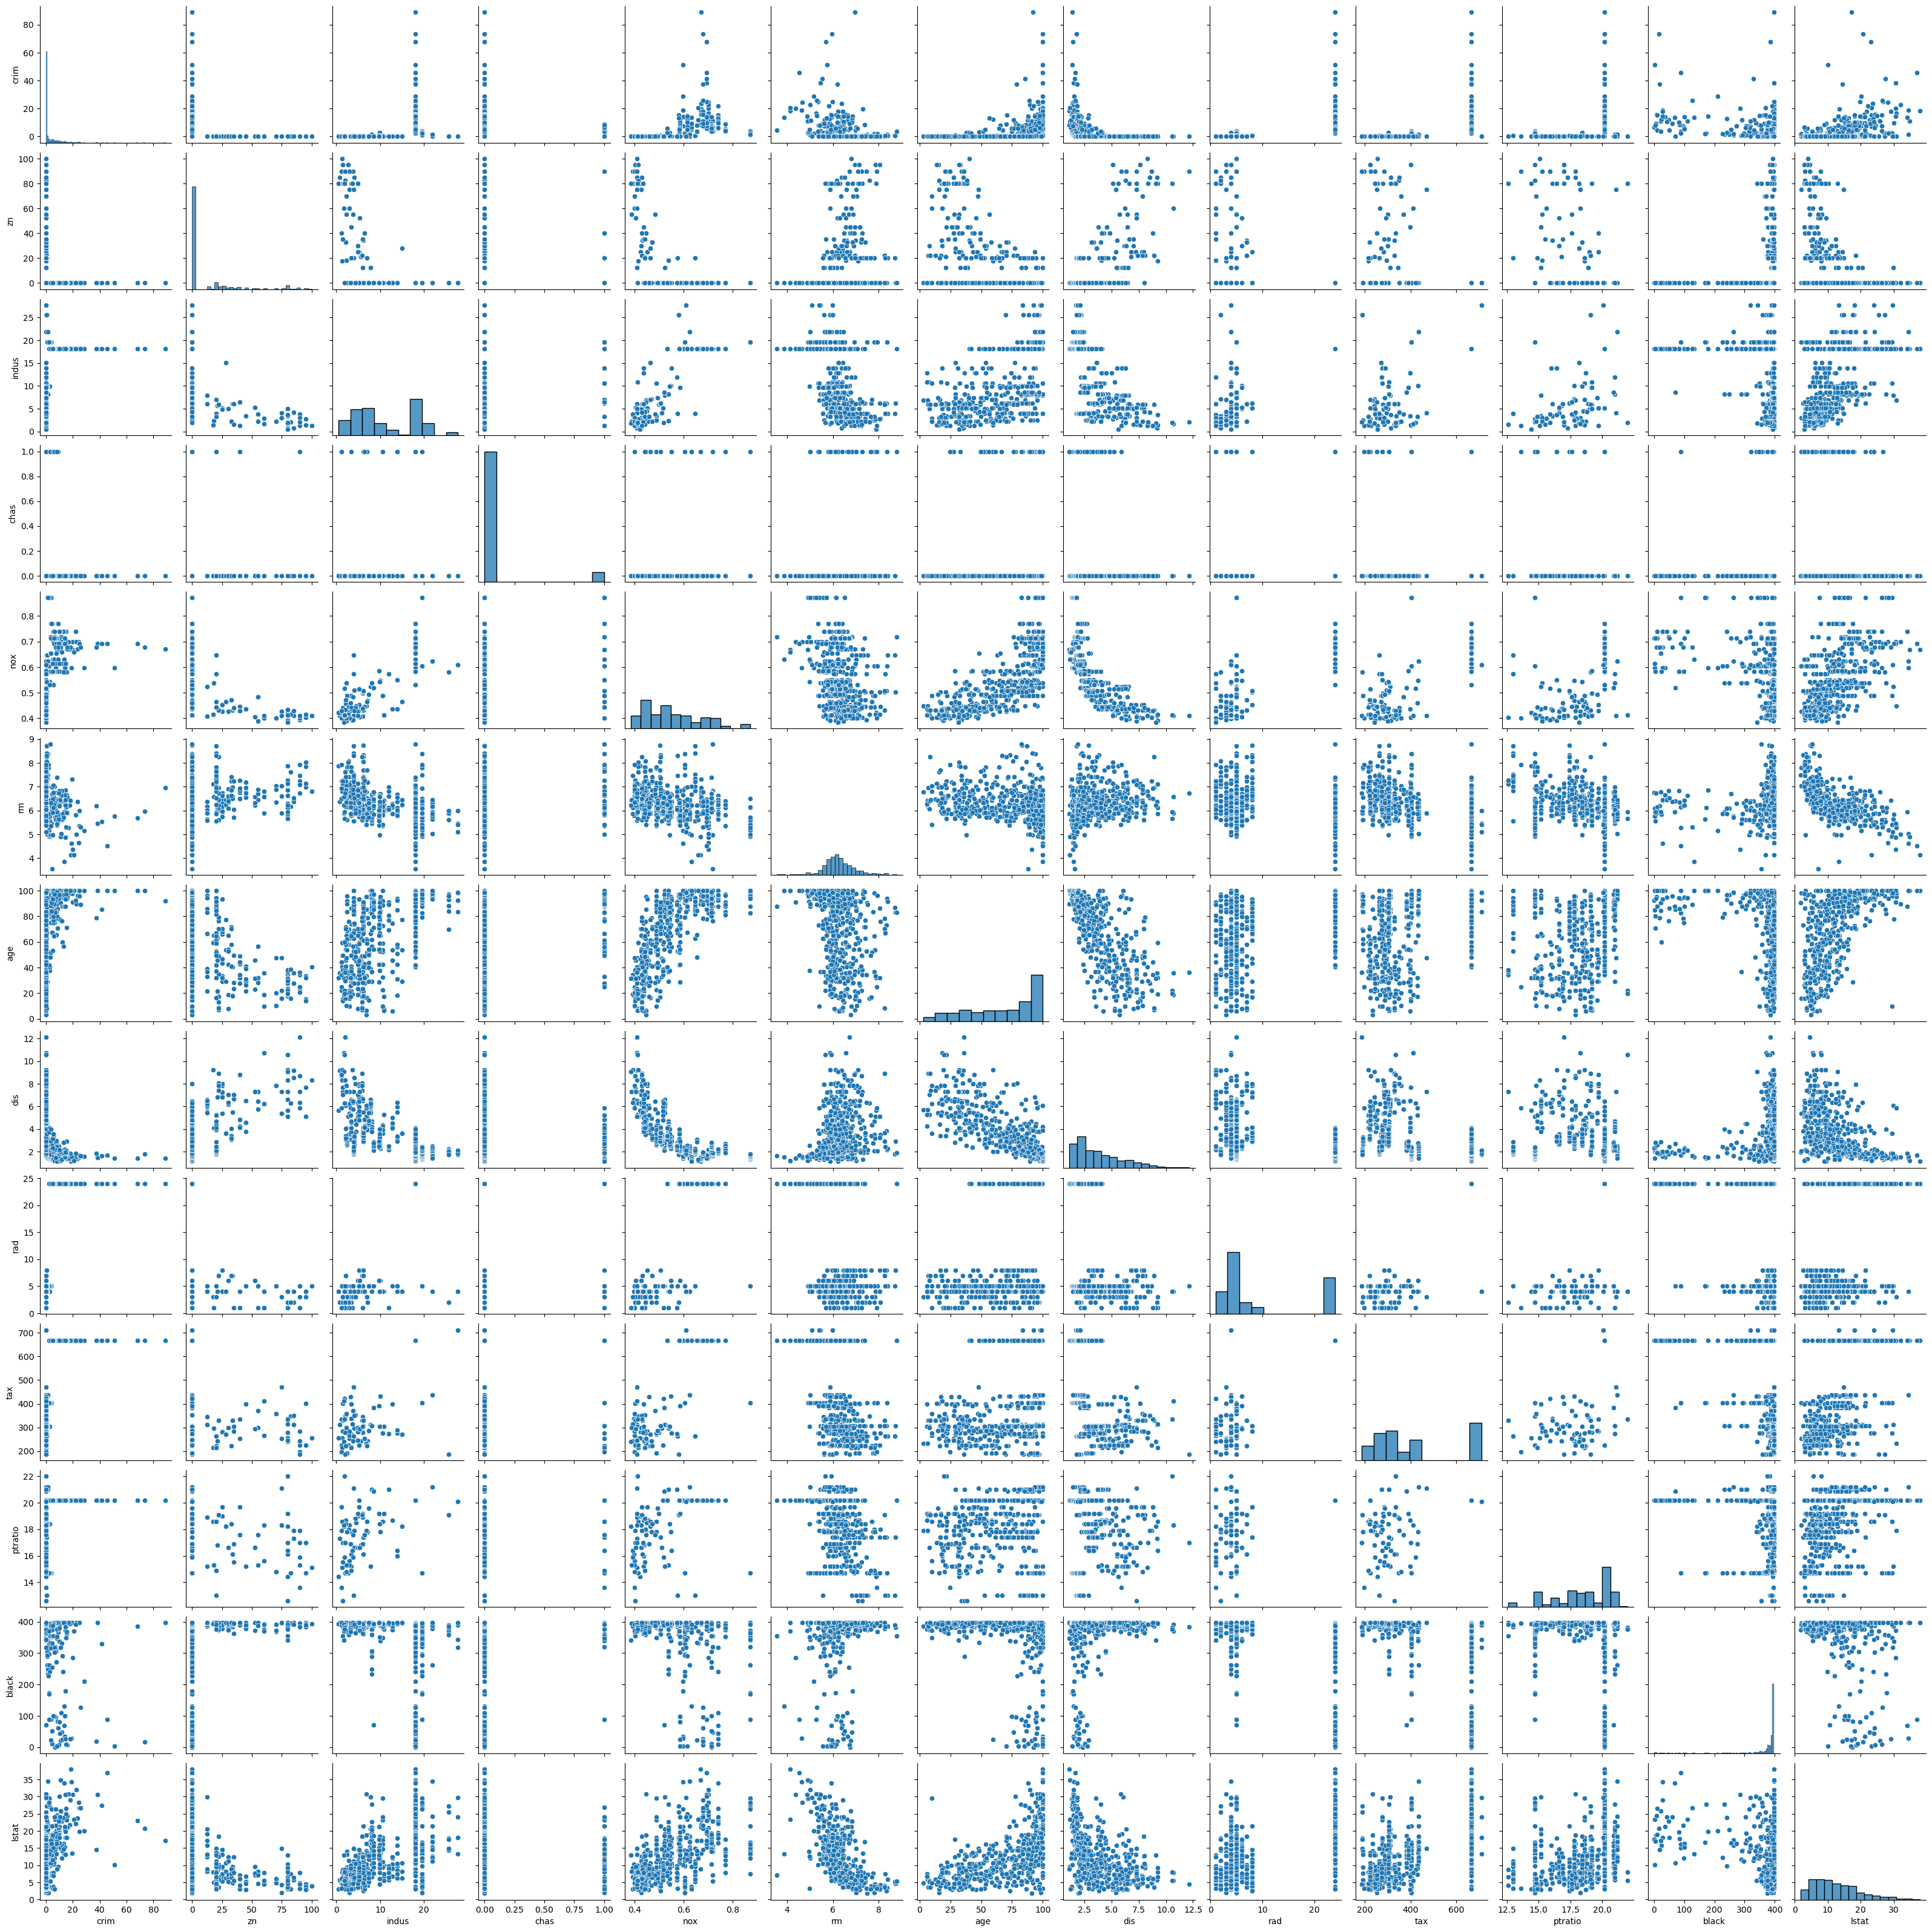

In [71]:
# Define the predictor variables
predictor_variables = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

# Create pairwise scatter plots for the predictor variables
sns.pairplot(df_boston[predictor_variables])

# Display the plots
plt.show()


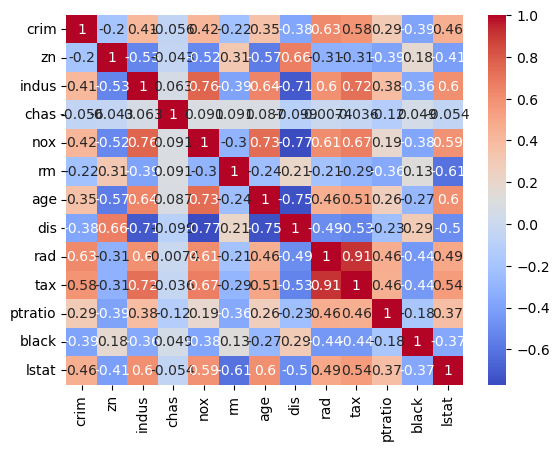

In [72]:
# Calculate the correlation matrix
corr_matrix = df_boston[predictor_variables].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


In [73]:
# Calculate the correlation matrix
corr_matrix = df_boston.corr()

# Get the correlations with 'crim'
crim_corr = corr_matrix['crim']

# Print the correlations
print(crim_corr)

Unnamed: 0    0.407407
crim          1.000000
zn           -0.200469
indus         0.406583
chas         -0.055892
nox           0.420972
rm           -0.219247
age           0.352734
dis          -0.379670
rad           0.625505
tax           0.582764
ptratio       0.289946
black        -0.385064
lstat         0.455621
medv         -0.388305
Name: crim, dtype: float64


based on the correlation, indus,nox, dis,rad, tax, black,lstat and medv show a correlation with crim. These might be useful predictors. 